# Лабораторна робота 7

**ПІБ:** Мулярчук Сергій Сергійович  
**Група:** КН22002б
**Варіант:** 5

---

## Завдання:

1. Створити програму для генерації довільного масиву із 32 цілих чисел, які не перевищують по модулю 255, з наступними властивостями:
   - При кожному запуску програми масив повинен бути різним
   - Масив повинен містити від 3 до 4 максимальних (однакових) елементів (розташованих в довільних місцях)
   - Масив повинен містити 60 відсотків від'ємних елементів (розташованих в довільних місцях). Щонайменше 6 останніх елементів повинні бути від'ємними

2. Зберегти згенерований масив в файл

3. Створити програму, яка зчитує із файлу згенерований масив попередньою програмою і виводить його на екран

4. Візуалізувати масив за допомогою стовпчастої горизонтальної діаграми. Виділити кольором вершини, які відповідають максимальним елементам, а також вказати ці значення на діаграмі. Виділити іншим кольором вершини, які відповідають додатнім елементам

5. Порахувати кількість та суму елементів масиву, розташованих між другим і третім максимальними

6. Порахувати суму елементів масиву, розташованих до останнього додатного елементу

7. Стиснути масив, видаливши елементи, які знаходяться в інтервалі [a,b]. a, b – задає користувач. Елементи, що звільнилися в кінці масиву, заповнити нулями. Вивести отриманий масив та його графічну діаграму на екран. Задані користувачем числа відобразити лініями

---

## Пункт 1. Генерація масиву з 32 цілих чисел

**Завдання:** Створити масив із 32 цілих чисел (|x| ≤ 255) з властивостями:
- 3-4 максимальних елементи
- 60% від'ємних елементів
- Щонайменше 6 останніх елементів від'ємні

In [32]:
import random
import numpy as np
import matplotlib.pyplot as plt
import json

def generate_array():

    arr = [0] * 32
    
    max_value = random.randint(100, 255)
    
    num_max = random.randint(3, 4)
    
    max_positions = random.sample(range(32), num_max)
    for pos in max_positions:
        arr[pos] = max_value
    
    last_6_positions = list(range(26, 32))
    
    available_for_negative = [i for i in range(26) if i not in max_positions]
    
    additional_negative = random.sample(available_for_negative, min(13, len(available_for_negative)))
    
    negative_positions = last_6_positions + additional_negative
    
    for pos in negative_positions:
        if arr[pos] == 0: 
            arr[pos] = random.randint(-255, -1)
    
    for i in range(32):
        if arr[i] == 0:
            arr[i] = random.randint(1, max_value - 1)
    
    return arr

array = generate_array()

print("Згенерований масив:")
print(array)
print(f"\nДовжина масиву: {len(array)}")
print(f"Максимальне значення: {max(array)}")
print(f"Кількість максимальних елементів: {array.count(max(array))}")
print(f"Кількість від'ємних елементів: {sum(1 for x in array if x < 0)}")
print(f"Останні 6 елементів: {array[-6:]}")
print(f"Всі від'ємні в останніх 6: {all(x < 0 for x in array[-6:])}")

Згенерований масив:
[-192, 86, -108, -192, -171, -169, 108, 80, -71, 73, -240, 32, 26, 89, -185, -122, 27, 44, 108, -44, -5, 108, -222, -80, 93, 108, -155, -223, -23, -140, -240, -176]

Довжина масиву: 32
Максимальне значення: 108
Кількість максимальних елементів: 4
Кількість від'ємних елементів: 19
Останні 6 елементів: [-155, -223, -23, -140, -240, -176]
Всі від'ємні в останніх 6: True


---

## Пункт 2. Збереження масиву у файл

**Завдання:** Зберегти згенерований масив у файл

In [33]:
def save_array_to_file(arr, filename='array_data.json'):

    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(arr, f, indent=2)
    print(f" Масив збережено у файл: {filename}")

save_array_to_file(array)

 Масив збережено у файл: array_data.json


---

## Пункт 3. Зчитування масиву з файлу

**Завдання:** Зчитати масив з файлу та вивести його на екран

In [34]:
def load_array_from_file(filename='array_data.json'):
    
    with open(filename, 'r', encoding='utf-8') as f:
        arr = json.load(f)
    print(f" Масив зчитано з файлу: {filename}")
    return arr

loaded_array = load_array_from_file()
print("\nЗчитаний масив:")
print(loaded_array)

 Масив зчитано з файлу: array_data.json

Зчитаний масив:
[-192, 86, -108, -192, -171, -169, 108, 80, -71, 73, -240, 32, 26, 89, -185, -122, 27, 44, 108, -44, -5, 108, -222, -80, 93, 108, -155, -223, -23, -140, -240, -176]


---

## Пункт 4. Візуалізація масиву

**Завдання:** Візуалізувати масив за допомогою горизонтальної стовпчастої діаграми з виділенням:
- Кольором - максимальні елементи (із значеннями на діаграмі)
- Іншим кольором - додатні елементи
- Ще одним кольором - від'ємні елементи

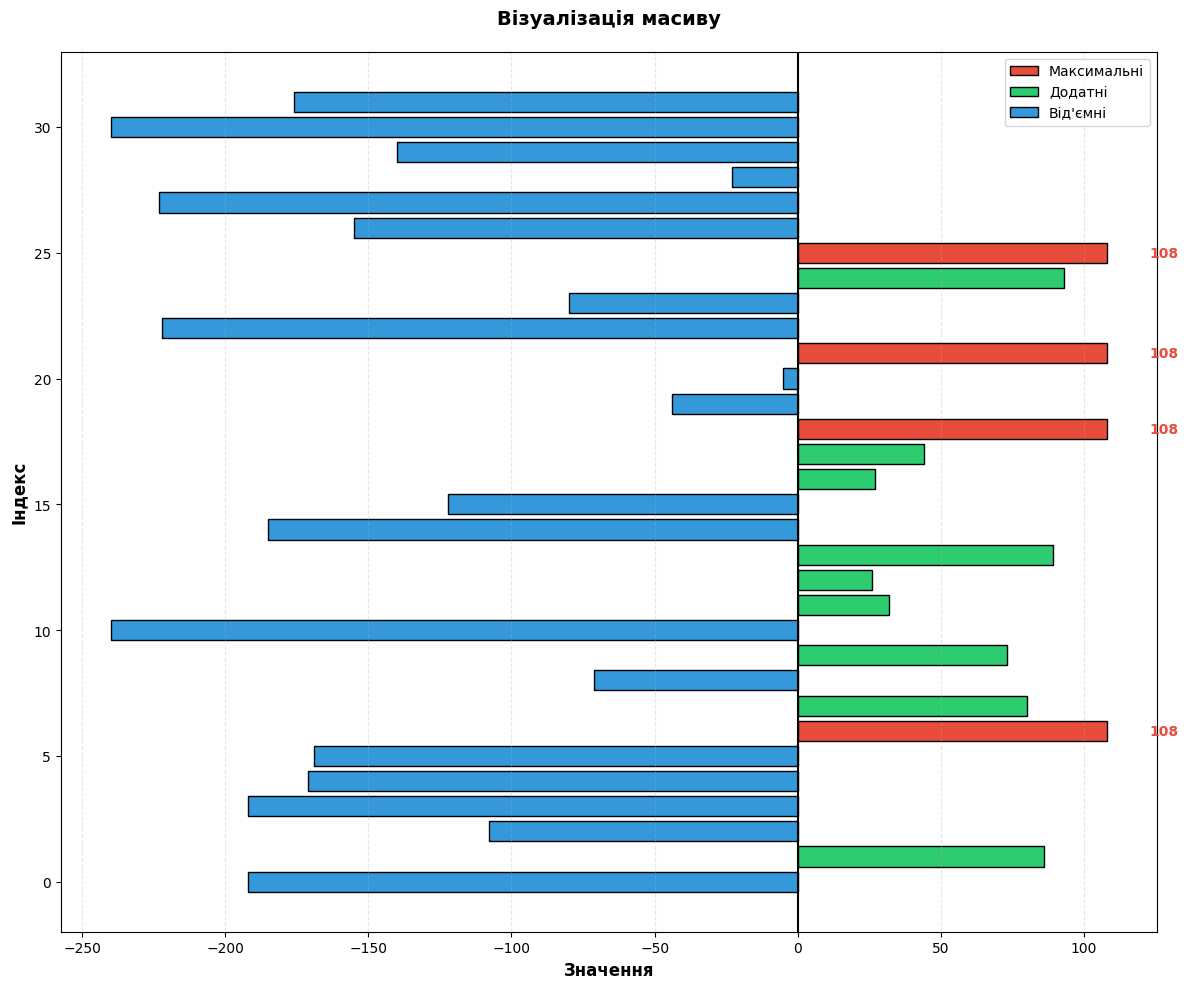


 Діаграму збережено: array_visualization.png


In [35]:
def visualize_array(arr, title="Візуалізація масиву"):

    max_value = max(arr)
    
    colors = []
    for value in arr:
        if value == max_value:
            colors.append('#e74c3c') 
        elif value > 0:
            colors.append('#2ecc71')
        else:
            colors.append('#3498db')
    
    fig, ax = plt.subplots(figsize=(12, 10))
    
    indices = range(len(arr))
    bars = ax.barh(indices, arr, color=colors, edgecolor='black', linewidth=1)
    
    for i, (value, bar) in enumerate(zip(arr, bars)):
        if value == max_value:
            x_pos = value + (15 if value > 0 else -15)
            ax.text(x_pos, i, f'{value}', va='center', ha='left' if value > 0 else 'right',
                   fontweight='bold', fontsize=10, color='#e74c3c')
    
    ax.set_xlabel('Значення', fontsize=12, fontweight='bold')
    ax.set_ylabel('Індекс', fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=14, fontweight='bold', pad=20)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    ax.axvline(x=0, color='black', linewidth=1.5)
    
    # legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#e74c3c', edgecolor='black', label='Максимальні'),
        Patch(facecolor='#2ecc71', edgecolor='black', label='Додатні'),
        Patch(facecolor='#3498db', edgecolor='black', label="Від'ємні")
    ]
    ax.legend(handles=legend_elements, loc='best', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('array_visualization.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("\n Діаграму збережено: array_visualization.png")

visualize_array(loaded_array)

---

## Пункт 5. Кількість та сума між 2-м і 3-м максимальними

**Завдання:** Порахувати кількість та суму елементів масиву, розташованих між другим і третім максимальними елементами

In [36]:
def sum_between_max(arr):

    max_value = max(arr)
    
    max_indices = [i for i, x in enumerate(arr) if x == max_value]
    
    if len(max_indices) < 3:
        print(f" Недостатньо максимальних елементів ({len(max_indices)})")
        return 0, 0
    
    second_max_idx = max_indices[1]
    third_max_idx = max_indices[2]
    
    start = min(second_max_idx, third_max_idx) + 1
    end = max(second_max_idx, third_max_idx)
    
    elements_between = arr[start:end]
    
    count = len(elements_between)
    total = sum(elements_between)
    
    print(f"Індекси максимальних елементів: {max_indices}")
    print(f"Другий максимум на індексі: {second_max_idx}")
    print(f"Третій максимум на індексі: {third_max_idx}")
    print(f"Елементи між ними (індекси {start}:{end}): {elements_between}")
    print(f"Кількість елементів: {count}")
    print(f"Сума елементів: {total}")
    
    return count, total

count, total = sum_between_max(loaded_array)

Індекси максимальних елементів: [6, 18, 21, 25]
Другий максимум на індексі: 18
Третій максимум на індексі: 21
Елементи між ними (індекси 19:21): [-44, -5]
Кількість елементів: 2
Сума елементів: -49


---

## Пункт 6. Сума елементів до останнього додатного

**Завдання:** Порахувати суму елементів масиву, розташованих до останнього додатного елементу

In [37]:
def sum_before_last_positive(arr):

    last_positive_idx = -1
    for i in range(len(arr) - 1, -1, -1):
        if arr[i] > 0:
            last_positive_idx = i
            break
    
    if last_positive_idx == -1:
        print("Немає додатних елементів")
        return 0
    
    elements_before = arr[:last_positive_idx]
    total = sum(elements_before)
    
    print(f"Останній додатний елемент: {arr[last_positive_idx]} (індекс {last_positive_idx})")
    print(f"Елементи до нього (індекси 0:{last_positive_idx}): {elements_before}")
    print(f"Сума елементів: {total}")
    
    return total

sum_before = sum_before_last_positive(loaded_array)

Останній додатний елемент: 108 (індекс 25)
Елементи до нього (індекси 0:25): [-192, 86, -108, -192, -171, -169, 108, 80, -71, 73, -240, 32, 26, 89, -185, -122, 27, 44, 108, -44, -5, 108, -222, -80, 93]
Сума елементів: -927


---

## Пункт 7. Стиснення масиву (видалення елементів в інтервалі [a, b])

**Завдання:** Стиснути масив, видаливши елементи, які знаходяться в інтервалі [a,b] (a, b задає користувач). Елементи, що звільнилися в кінці масиву, заповнити нулями. Вивести отриманий масив

In [38]:
def compress_array(arr, a, b):
   
    compressed = arr.copy()
    
    filtered = [x for x in compressed if not (a <= x <= b)]
    
    removed_count = len(compressed) - len(filtered)
    result = filtered + [0] * removed_count
    
    print(f"\nІнтервал видалення: [{a}, {b}]")
    print(f"Видалено елементів: {removed_count}")
    print(f"\nСтиснутий масив:")
    print(result)
    
    return result, removed_count

print("Введіть межі інтервалу для видалення елементів:")
a = int(input("a = "))
b = int(input("b = "))

compressed_array, removed = compress_array(loaded_array, a, b)

Введіть межі інтервалу для видалення елементів:

Інтервал видалення: [-40, 40]
Видалено елементів: 5

Стиснутий масив:
[-192, 86, -108, -192, -171, -169, 108, 80, -71, 73, -240, 89, -185, -122, 44, 108, -44, 108, -222, -80, 93, 108, -155, -223, -140, -240, -176, 0, 0, 0, 0, 0]

Інтервал видалення: [-40, 40]
Видалено елементів: 5

Стиснутий масив:
[-192, 86, -108, -192, -171, -169, 108, 80, -71, 73, -240, 89, -185, -122, 44, 108, -44, 108, -222, -80, 93, 108, -155, -223, -140, -240, -176, 0, 0, 0, 0, 0]


---

## Візуалізація стиснутого масиву

**Завдання:** Вивести графічну діаграму стиснутого масиву. Задані користувачем числа a та b відобразити лініями

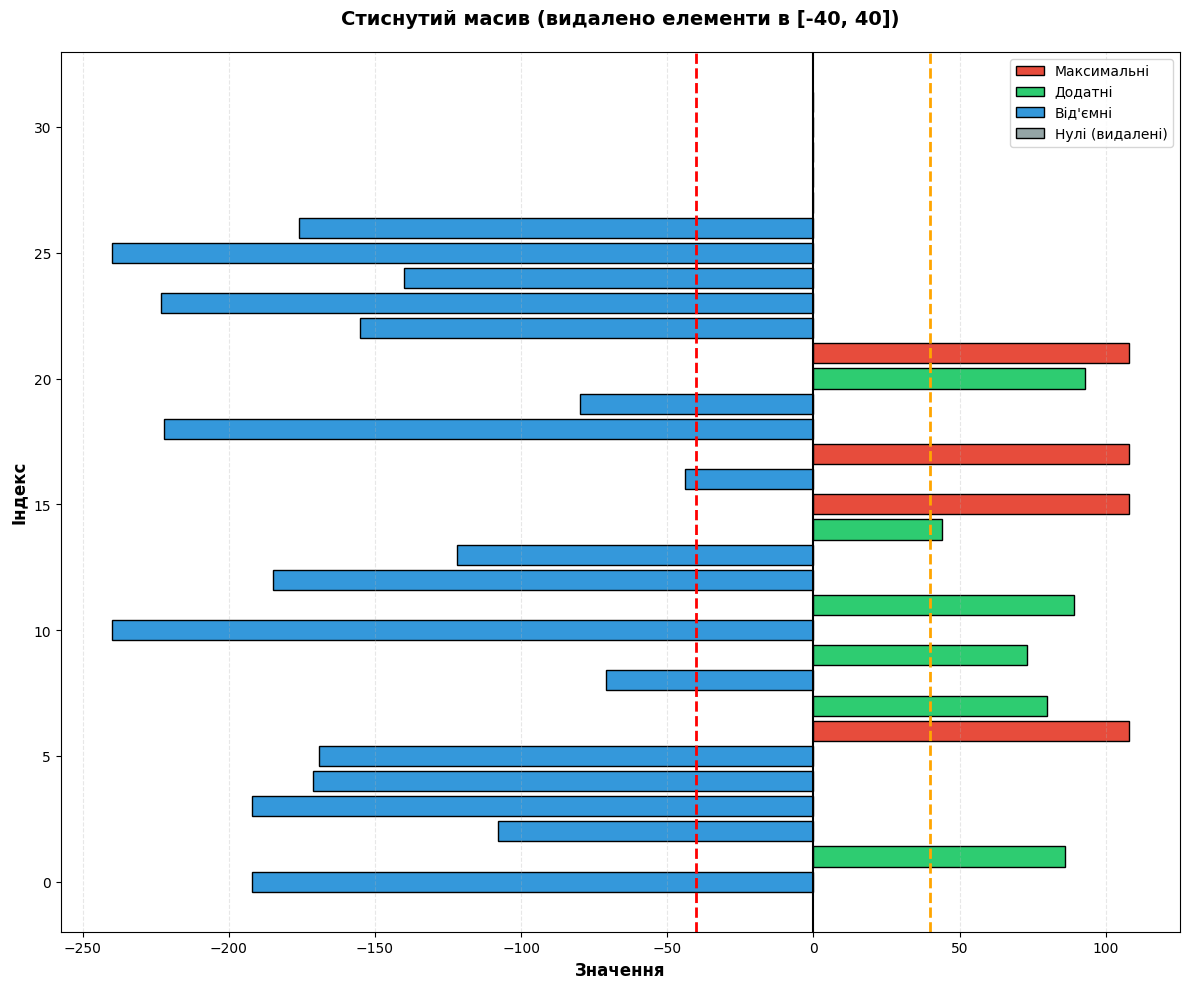


Діаграму збережено: compressed_array_visualization.png


In [39]:
def visualize_compressed_array(original, compressed, a, b):

    max_val = max([x for x in compressed if x != 0], default=1)
    
    colors = []
    for value in compressed:
        if value == 0:
            colors.append('#95a5a6')
        elif value == max_val:
            colors.append('#e74c3c')
        elif value > 0:
            colors.append('#2ecc71')
        else:
            colors.append('#3498db')
    
    fig, ax = plt.subplots(figsize=(12, 10))
    
    indices = range(len(compressed))
    bars = ax.barh(indices, compressed, color=colors, edgecolor='black', linewidth=1)
    
    ax.axvline(x=a, color='red', linewidth=2, linestyle='--', label=f'a = {a}')
    ax.axvline(x=b, color='orange', linewidth=2, linestyle='--', label=f'b = {b}')
    
    ax.set_xlabel('Значення', fontsize=12, fontweight='bold')
    ax.set_ylabel('Індекс', fontsize=12, fontweight='bold')
    ax.set_title(f'Стиснутий масив (видалено елементи в [{a}, {b}])', 
                fontsize=14, fontweight='bold', pad=20)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    ax.axvline(x=0, color='black', linewidth=1.5)
    
    # legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#e74c3c', edgecolor='black', label='Максимальні'),
        Patch(facecolor='#2ecc71', edgecolor='black', label='Додатні'),
        Patch(facecolor='#3498db', edgecolor='black', label="Від'ємні"),
        Patch(facecolor='#95a5a6', edgecolor='black', label='Нулі (видалені)')
    ]
    ax.legend(handles=legend_elements, loc='best', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('compressed_array_visualization.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("\nДіаграму збережено: compressed_array_visualization.png")

# Візуалізуємо стиснутий масив
visualize_compressed_array(loaded_array, compressed_array, a, b)

---

## Підсумок результатів виконання всіх пунктів

In [40]:
print("=" * 70)
print("ПІДСУМОК ВИКОНАННЯ ЛАБОРАТОРНОЇ РОБОТИ 7")
print("=" * 70)
print(f"\n1. Початковий масив ({len(loaded_array)} елементів):")
print(f"   {loaded_array}")
print(f"\n2. Властивості масиву:")
print(f"   - Максимальне значення: {max(loaded_array)}")
print(f"   - Кількість максимальних: {loaded_array.count(max(loaded_array))}")
print(f"   - Кількість від'ємних: {sum(1 for x in loaded_array if x < 0)} ({sum(1 for x in loaded_array if x < 0)/len(loaded_array)*100:.1f}%)")
print(f"\n3. Між 2-м і 3-м максимальними:")
print(f"   - Кількість елементів: {count}")
print(f"   - Сума: {total}")
print(f"\n4. Сума до останнього додатного: {sum_before}")
print(f"\n5. Стиснення масиву:")
print(f"   - Інтервал видалення: [{a}, {b}]")
print(f"   - Видалено елементів: {removed}")
print(f"   - Стиснутий масив: {compressed_array}")
print("\n" + "=" * 70)

ПІДСУМОК ВИКОНАННЯ ЛАБОРАТОРНОЇ РОБОТИ 7

1. Початковий масив (32 елементів):
   [-192, 86, -108, -192, -171, -169, 108, 80, -71, 73, -240, 32, 26, 89, -185, -122, 27, 44, 108, -44, -5, 108, -222, -80, 93, 108, -155, -223, -23, -140, -240, -176]

2. Властивості масиву:
   - Максимальне значення: 108
   - Кількість максимальних: 4
   - Кількість від'ємних: 19 (59.4%)

3. Між 2-м і 3-м максимальними:
   - Кількість елементів: 2
   - Сума: -49

4. Сума до останнього додатного: -927

5. Стиснення масиву:
   - Інтервал видалення: [-40, 40]
   - Видалено елементів: 5
   - Стиснутий масив: [-192, 86, -108, -192, -171, -169, 108, 80, -71, 73, -240, 89, -185, -122, 44, 108, -44, 108, -222, -80, 93, 108, -155, -223, -140, -240, -176, 0, 0, 0, 0, 0]



In [41]:
import sys
import subprocess

print("=" * 70)
print("ІНФОРМАЦІЯ ПРО СЕРЕДОВИЩЕ ВИКОНАННЯ")
print("=" * 70)

# Версія Python
print(f"\nВерсія Python: {sys.version}")
print(f"Версія (коротка): Python {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}")

# Список встановлених пакетів
print("\n" + "=" * 70)
print("ВСТАНОВЛЕНІ ПАКЕТИ:")
print("=" * 70 + "\n")

result = subprocess.run([sys.executable, "-m", "pip", "list"], 
                       capture_output=True, text=True)
print(result.stdout)

ІНФОРМАЦІЯ ПРО СЕРЕДОВИЩЕ ВИКОНАННЯ

Версія Python: 3.13.7 (tags/v3.13.7:bcee1c3, Aug 14 2025, 14:15:11) [MSC v.1944 64 bit (AMD64)]
Версія (коротка): Python 3.13.7

ВСТАНОВЛЕНІ ПАКЕТИ:

Package                 Version
----------------------- -----------
asttokens               3.0.1
colorama                0.4.6
comm                    0.2.3
contourpy               1.3.3
cycler                  0.12.1
debugpy                 1.8.17
decorator               5.2.1
et_xmlfile              2.0.0
executing               2.2.1
Faker                   38.2.0
fonttools               4.60.1
ipykernel               7.1.0
ipython                 9.7.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
jupyter_client          8.6.3
jupyter_core            5.9.1
kiwisolver              1.4.9
matplotlib              3.10.7
matplotlib-inline       0.2.1
nest-asyncio            1.6.0
numpy                   2.3.5
openpyxl                3.1.5
packaging               25.0
parso               

---

## Інформація про середовище виконання

**Завдання:** Вивести версію Python та список встановлених пакетів